In [1]:
import gym
import gym_maze
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def get_next_location(action):
    next_state, reward, done, truncated = env.step(action)
    print(next_state)
    return next_state[0], next_state[1]

In [3]:
def get_next_action(current_row_index, current_column_index, epsilon):
  #if a randomly chosen value between 0 and 1 is less than epsilon, 
  #then choose the most promising value from the Q-table for this state.
  if np.random.random() > epsilon:
    return np.argmax(q_values[current_row_index, current_column_index])
  else: #choose a random action
    return np.random.randint(4)

In [4]:
# epsilon = 0.9 #the percentage of time when we should take the best action (instead of a random action)
discount_factor = 0.9 #discount factor for future rewards
learning_rate = 0.9 #the rate at which the AI agent should learn
def q_learning(num):
    epsilon = 0.9 
    #counter = 0
    sum = 0
    
    sum_of_rewards_array = []
    iterations_array = []
    episode_steps = []
    
    for episode in range(num):
        current_state = env.reset()
        sum_of_rewards = 0
        row_index = int(current_state[0])
        column_index = int(current_state[1])
        limit = 0
        done = False
        
        steps = 0
        while not done:
            steps += 1
            epsilon -= 0.001
            limit += 1
            # if limit > 200:
            #     break

            env.render()
            action_index = get_next_action(row_index, column_index, epsilon)
            
            
            #perform the chosen action, and transition to the next state (i.e., move to the next location)
            old_row_index, old_column_index = row_index, column_index #store the old row and column indexes
            
            next_state, reward, done, truncated = env.step(action_index)
            sum_of_rewards += reward
            row_index = next_state[0]
            column_index = next_state[1]
    
            old_q_value = q_values[old_row_index, old_column_index, action_index]
            temporal_difference = reward + (discount_factor * np.max(q_values[row_index, column_index,:])) - old_q_value
        
            #update the Q-value for the previous state and action pair
            new_q_value = old_q_value + (learning_rate * temporal_difference)
            q_values[old_row_index, old_column_index, action_index] = new_q_value
            #if(done):
                #counter += 1
                #print(episode,':', steps, end='   ')
                
        sum += steps    
        sum_of_rewards_array.append(sum_of_rewards)
        episode_steps.append(steps)
        
        iterations_array.append(episode)
    print('Training complete!')
    avg = sum // num
    print(avg)

    plt.figure(figsize = (8,6))
    plt.plot(iterations_array, sum_of_rewards_array)
    plt.scatter(iterations_array, sum_of_rewards_array , marker='o', color='red')
    plt.title("Rewards vs Episode")
    plt.ylabel("Sum_Of_Rewards")
    plt.xlabel("Episode")
    plt.show()


    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.plot(sum_of_rewards_array, '-g', label = 'reward')
    ax1.set_yticks([0,1])
    ax2 = ax1.twinx()
    ax2.plot(episode_steps, '+r', label = 'step')
    ax1.set_xlabel("episode")
    ax1.set_ylabel("reward")
    ax2.set_ylabel("step")
    ax1.legend(loc=2)
    ax2.legend(loc=1)
    plt.title("Training Progress")
    plt.show()

Training complete!
54


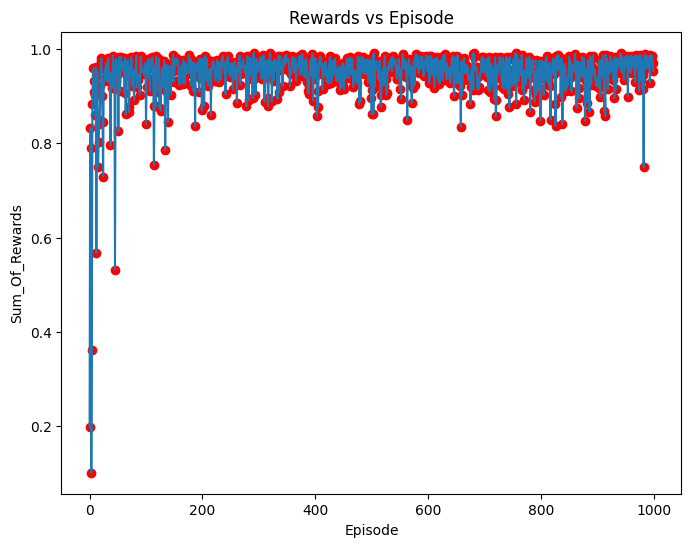

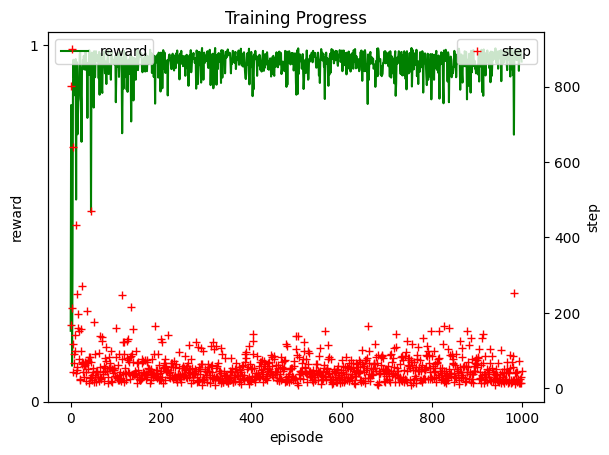

In [5]:
# Create an environment
env = gym.make("maze-random-10x10-plus-v0")
observation = env.reset()
NUM_EPISODES = 1000

q_values = np.zeros((10, 10, 4))
q_learning(NUM_EPISODES)
#print(q_values)